In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
accounts = pd.read_csv("../Resources/accounts.csv")
gpa = pd.read_csv("../Resources/group_product_associations.csv")

## 1) Generate a bar chart visualizing the relative frequency of Products registered with Accounts.

In [3]:
# Rename columns
gpa = gpa.rename(columns={"id":"gpa_id"})
accounts = accounts.rename(columns={"id":"accounts_df_id"})

In [4]:
# Merge accounts and gpa data frames
group_id_merge = gpa.merge(accounts, how="inner",on="group_id")
group_id_merge.head()

,gpa_id,group_id,product_id,accounts_df_id,organization_id,registration_date,is_written_off,is_unlocked
0,1,1,42,2,10001,2019-11-06 05:49:39.571392,False,True
1,1,1,42,3,10001,2019-11-14 14:57:02.571392,False,False
2,1,1,42,4,10001,2019-12-11 03:18:53.571392,False,True
3,1,1,42,5,10001,2019-10-31 22:36:23.571392,False,False
4,1,1,42,6,10001,2019-09-29 13:04:45.571392,False,True


In [5]:
# Group by product_id and count number of records
df_product_registration = group_id_merge.groupby('product_id', as_index=False)['registration_date'].count()

# Rename column
df_product_registration = df_product_registration.rename(columns={'registration_date':'registration_count'})
df_product_registration.head(10)

,product_id,registration_count
0,1,21
1,2,11
2,3,11
3,4,21
4,5,11
5,6,21
6,7,11
7,8,41
8,9,11
9,10,21


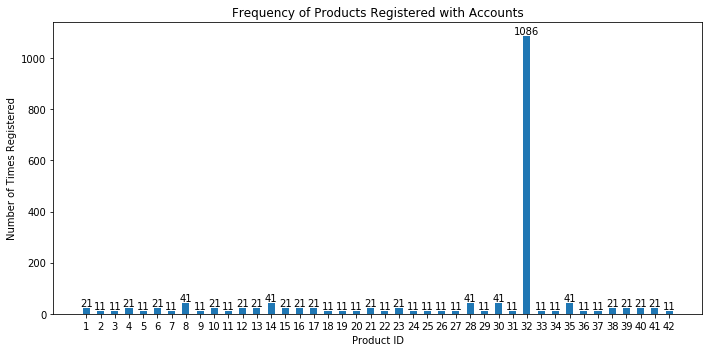

In [9]:
# Make bar chart with product_id on x-axis, and registration_count on y-axis

# Set x and y values
x_values = df_product_registration['product_id'].tolist()
y_values = df_product_registration['registration_count'].tolist()

# Format plot
plt.figure(figsize=(10, 5))
registration_rect = plt.bar(x_values, y_values, width=0.5)
plt.title("Frequency of Products Registered with Accounts")
plt.xlabel("Product ID")
plt.xticks(x_values)
plt.ylabel("Number of Times Registered")

# Create function to label bars
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.5, height,
                ha='center', va='bottom', color="black")

# Call function
label_bars(registration_rect)

# Save figure
plt.savefig("../Output/product_registration1.png")

# Show figure
plt.tight_layout()
plt.show()

In [10]:
# Drop outliers
del x_values[31]
del y_values[31]

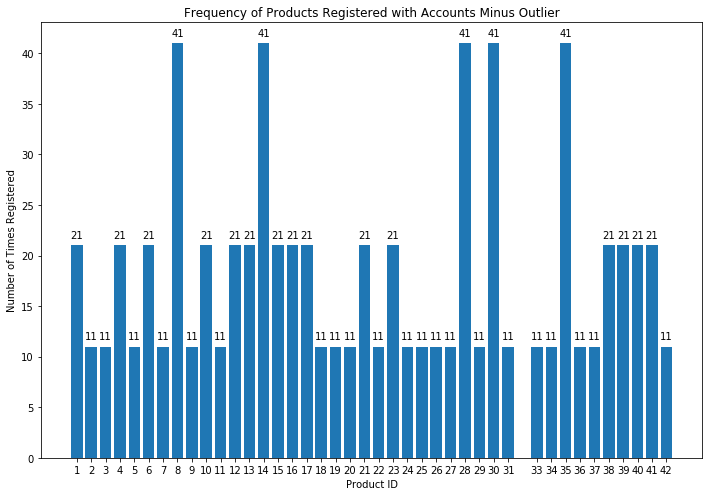

In [13]:
# Make bar chart excluding outlier: Product_ID 32 with 1086 count of registrations

# Format plot
plt.figure(figsize=(10, 7))
registration_rect2 = plt.bar(x_values, y_values)
plt.title("Frequency of Products Registered with Accounts Minus Outlier")
plt.xlabel("Product ID")
plt.xticks(x_values)
plt.ylabel("Number of Times Registered")

# Call function
label_bars(registration_rect2)

# Save figure
plt.savefig("../Output/product_registration2.png")

# Show figure
plt.tight_layout()
plt.show()